In [1]:
import numpy as np

import matplotlib  
matplotlib.use('nbagg')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn

In [2]:
from sklearn import datasets

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs

In [99]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [177]:
from sklearn.metrics import log_loss

In [42]:
def log_regression(X, y):
    xx, yy = np.mgrid[-8:8:.01, -8:8:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-8, 8), ylim=(-8, 8),
           xlabel="$X_1$", ylabel="$X_2$")

    plt.show()

# 1. Perfectly separable data

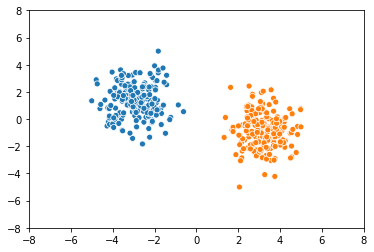

In [4]:
X1, y1 = make_blobs(n_samples=400, n_features=2, centers=2,cluster_std=1,
                    center_box=(-5, 5), shuffle=True, random_state = 15)

X1_new =  MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X1);
# X1_new = X1
sns.scatterplot(x=X1_new[:,0], y=X1_new[:,1], hue=y1, hue_order=[1,0], legend=False)

plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [5]:
# stack the data so that we can save it as csv.
cls_data1 = np.column_stack((X1_new, y1))
np.savetxt("1_separable.csv", cls_data1, delimiter=',');

[LibLinear]

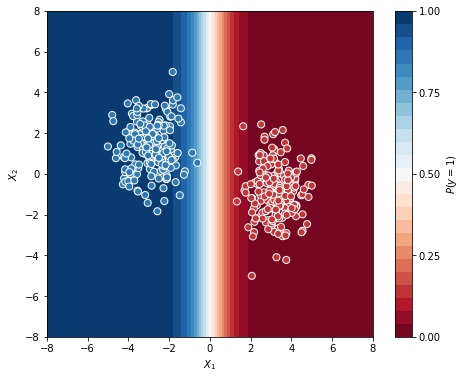

In [199]:
clf = LogisticRegression(penalty='l1', C=0.1, verbose=2)
clf.fit(X1_new, y1)
log_regression(X1_new, y1)

In [198]:
clf.coef_, clf.intercept_

(array([[-1.71804523,  0.        ]]), array([0.]))

### SGD classifier

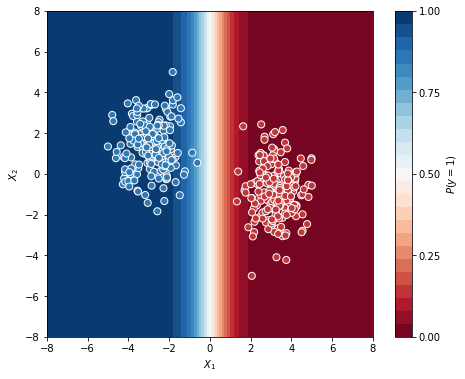

In [193]:
clf1 = SGDClassifier(loss='log', penalty='l1', alpha=1,tol=0.0001)
clf1.fit(X1_new, y1)
log_regression(X1_new, y1)

In [190]:
clf1.intercept_, clf1.coef_

(array([0.18946191]), array([[-0.23012587,  0.        ]]))

In [192]:
clf1.intercept_, clf1.coef_

(array([0.1321015]), array([[-0.22742558,  0.        ]]))

In [194]:
clf1.intercept_, clf1.coef_

(array([-0.0055651]), array([[-0.22367814,  0.        ]]))

## SGD with no regularization

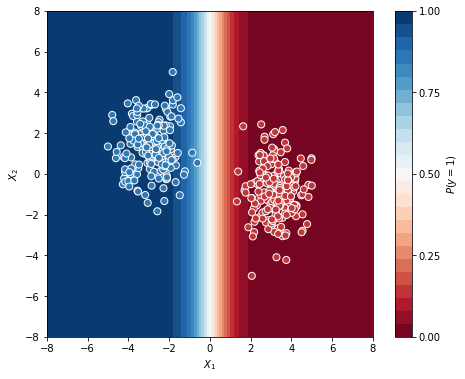

In [185]:
clf1 = SGDClassifier(loss='log', penalty='l2', alpha=0.1,max_iter=1000, tol=0.000001 )
clf1.fit(X1_new, y1)
log_regression(X1_new, y1)

In [186]:
clf1.intercept_, clf1.coef_ 

(array([0.25394633]), array([[-1.04597584,  0.26428221]]))

In [184]:
clf1.intercept_, clf1.coef_ 

(array([-0.05125549]), array([[-1.03313003,  0.29512491]]))

In [182]:
clf1.intercept_, clf1.coef_ 

(array([0.21008444]), array([[-1.04077971,  0.26799061]]))

In [178]:
y_pred = clf1.predict_log_proba(X1_new)

In [180]:
log_loss(y1, y_pred)

0.6931471805599452

In [143]:
clf1.coef_, clf1.intercept_

(array([[-3.76963733,  1.3408001 ]]), array([-0.84330714]))

In [141]:
clf1.coef_, clf1.intercept_

(array([[-3.01169159,  0.89288376]]), array([0.86893657]))

In [135]:
clf1.coef_, clf1.intercept_

(array([[-4.12201266,  0.68274528]]), array([-0.86706916]))

In [138]:
clf1.coef_, clf1.intercept_

(array([[-2.34597901,  0.97967327]]), array([0.77312581]))

# 2. Separable data but with some points mixed 

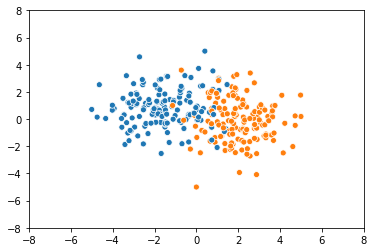

In [6]:
X2, y2 = make_blobs(n_samples=300, n_features=2, centers=2,cluster_std=3,
                    center_box=(-5, 5), shuffle=True, random_state = 15)

X2_new =  MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X2);

sns.scatterplot(x=X2_new[:,0], y=X2_new[:,1], hue=y2, hue_order=[1,0], legend=False)

plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [7]:
# stack the data so that we can save it as csv.
cls_data2 = np.column_stack((X2_new, y2))
np.savetxt("2_separable.csv", cls_data2, delimiter=',');

# 3. Moons dataset with mild noise.. 

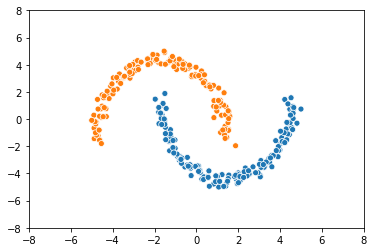

In [8]:
X3, y3 = datasets.make_moons(n_samples=300, shuffle=True, 
                             noise=0.05, random_state=15);

X3_new = MinMaxScaler(feature_range=(-5,5), copy=True).fit_transform(X3);

sns.scatterplot(x=X3_new[:, 0], y=X3_new[:,1], hue=y3, hue_order=[1,0], legend=False)

plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [9]:
# stack both X and y so that we can save it to the disk as csv file.
cls_data3 =  np.column_stack((X3_new, y3));
np.savetxt("3_moons_mild_noise.csv", cls_data3, delimiter=',');

# 4. Moons dataset with more noise. 

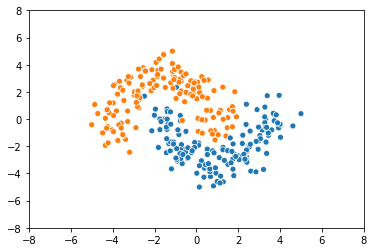

In [10]:
X4, y4 = datasets.make_moons(n_samples=300, shuffle=True, 
                             noise=0.20, random_state=15);

X4_new = MinMaxScaler(feature_range=(-5,5), copy=True).fit_transform(X4);

sns.scatterplot(x=X4_new[:, 0], y=X4_new[:,1], hue=y4, hue_order=[1,0], legend=False)

plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [11]:
# stack both X and y so that we can save it to the disk as csv file.
cls_data4 =  np.column_stack((X4_new, y4));
np.savetxt("4_moons_more_noise.csv", cls_data4, delimiter=',');

# 5. Circle dataset with mild noise.

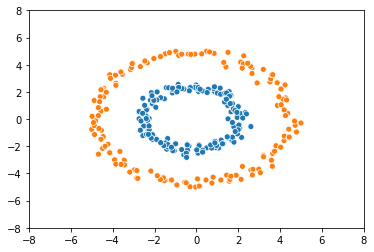

In [34]:
X5, y5 = datasets.make_circles(n_samples=300, shuffle= True, noise = 0.05,
                               random_state=15, factor=0.5)
X5_new = MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X5);

sns.scatterplot(x=X5_new[:, 0], y=X5_new[:, 1], hue=y5, hue_order=[1,0], legend=False)
plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [35]:
# stack X and y so that we can save the dataset as csv file.
cls_data5 = np.column_stack((X5_new, y5));
np.savetxt("5_circles_mild_noise.csv", cls_data5, delimiter=',');

# 6. Circle dataset with High noise.

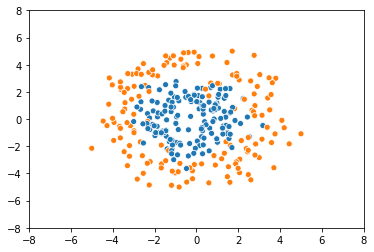

In [30]:
X6, y6 = datasets.make_circles(n_samples=300, shuffle= True, noise = 0.2,
                               random_state=15, factor=0.5)
X6_new = MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X6);

sns.scatterplot(x=X6_new[:, 0], y=X6_new[:, 1], hue=y6, hue_order=[1,0], legend=False)
plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [31]:
# stack X and y so that we can save the dataset as csv file.
cls_data6 = np.column_stack((X6_new, y6));
np.savetxt("6_circles_high_noise.csv", cls_data6, delimiter=',');

# 7.Xor data

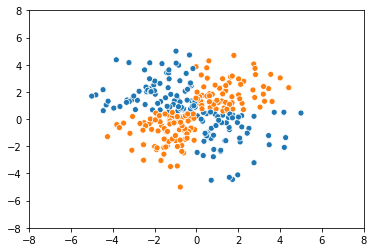

In [17]:
rng = np.random.RandomState(0)
X7 = rng.randn(300, 2);
y7 = np.logical_xor(X7[:,0]>0, X7[:,1]>0)

X7_new =  MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X7);
# X7_new = X7
sns.scatterplot(x=X7_new[:,0], y=X7_new[:,1], hue=y7, hue_order=[1,0], legend=False)

plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [18]:
# stack the data so that we can save it as csv.
cls_data7 = np.column_stack((X7_new, y7))
np.savetxt("7_ex-or.csv", cls_data7, delimiter=',');

# Spirl data 

In [19]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))


## 8. Spiral data without noise

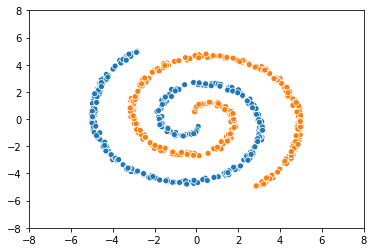

In [20]:
X8, y8 = twospirals(n_points=300, noise=0.5);
# rescale the data to -8 to 8.

X8 = MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X8);

sns.scatterplot(x=X8[:,0], y=X8[:,1], hue=y8, hue_order=[1,0],  legend=False);
plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [21]:
# stack X and y so that we can save the dataset as csv file.
cls_data8 = np.column_stack((X8, y8));
np.savetxt("8_mild_noise_spiral.csv", cls_data8, delimiter=',');

## 9. Spiral with more noise

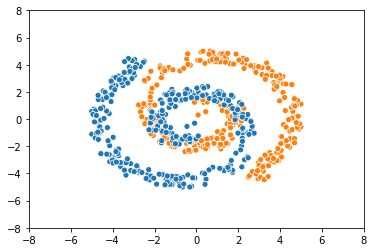

In [22]:
X9, y9 = twospirals(n_points=300, noise=2);

X9 = MinMaxScaler(feature_range=(-5, 5), copy=True).fit_transform(X9);

sns.scatterplot(x=X9[:,0], y=X9[:,1], hue=y9, hue_order=[1,0],  legend=False);
plt.ylim(-8, 8);
plt.xlim(-8, 8);

In [23]:
# stack X and y so that we can save the dataset as csv file.
cls_data9 = np.column_stack((X9, y9));
np.savetxt("9_noisy_spiral.csv", cls_data9, delimiter=',');

## Testing it with logistic regression from sklearn

=================================================================

In [ ]:
log_loss(y, y_pred)

In [ ]:
y_pred = y_pred[:,1]

In [ ]:
y_pred = clf.predict_proba(X)

In [ ]:
X[100:,0].shape